<a href="https://colab.research.google.com/github/yboulaamane/GMXPlotter/blob/main/GMXPlotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GMXPlotter

**GMXPlotter** is a lightweight and reproducible analysis workflow for molecular dynamics (MD) simulations performed with GROMACS.  
It provides automated visualization of key structural and energetic properties using Python, Matplotlib, and Google Colab.  

Supported analyses include:
- RMSD (backbone and ligand)  
- RMSF (per-residue flexibility)  
- Radius of gyration  
- Solvent accessible surface area (SASA)  
- Principal component analysis (PCA) and eigenvalue spectra  
- Hydrogen bond dynamics  
- MM/PBSA per-residue free energy decomposition  

GMXPlotter is designed for clarity, reproducibility, and publication-ready figures, making it suitable for high-impact computational chemistry and drug discovery studies.

### Backbone RMSD
The root mean square deviation (RMSD) of the protein backbone over the simulation time, indicating overall structural stability and equilibration.


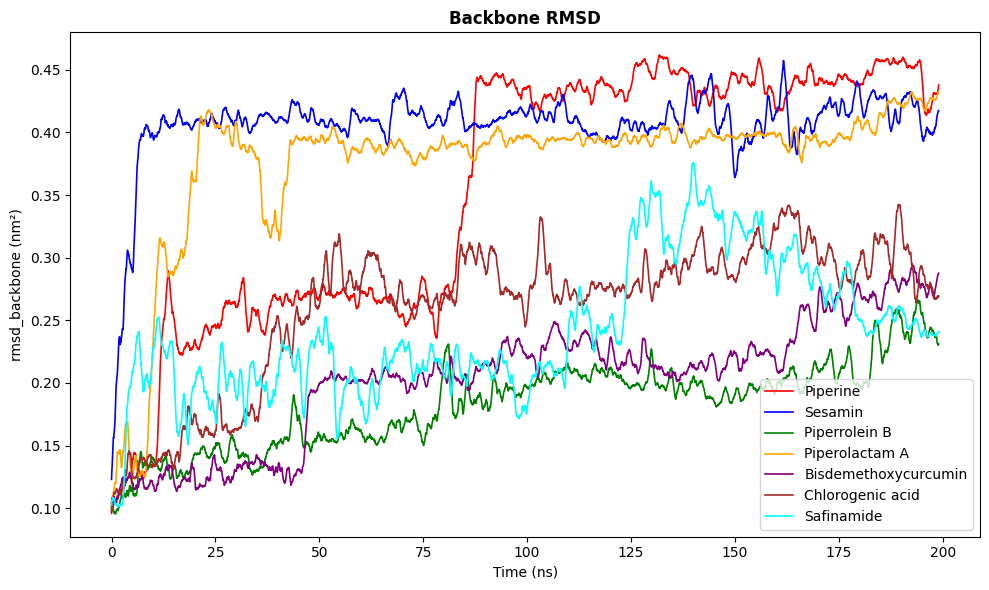

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Files
files = [
    ("rmsd_backbone/rmsd_backbone_piperine.xvg", "Piperine", "red"),
    ("rmsd_backbone/rmsd_backbone_sesamin.xvg", "Sesamin", "blue"),
    ("rmsd_backbone/rmsd_backbone_piperroleinb.xvg", "Piperrolein B", "green"),
    ("rmsd_backbone/rmsd_backbone_piperolactama.xvg", "Piperolactam A", "orange"),
    ("rmsd_backbone/rmsd_backbone_bisdemethoxycurcumin.xvg", "Bisdemethoxycurcumin", "purple"),
    ("rmsd_backbone/rmsd_backbone_chloro.xvg", "Chlorogenic acid", "brown"),
    ("rmsd_backbone/rmsd_backbone_safinamide.xvg", "Safinamide", "cyan"),
]

def load_xvg(path):
    data = []
    with open(path) as f:
        for line in f:
            if line.startswith(("#","@")): continue
            parts = line.strip().split()
            if len(parts) >= 2:
                data.append((float(parts[0]), float(parts[1])))
    data = np.array(data)
    return data[:,0], data[:,1]

# Smoothed plot
plt.figure(figsize=(10,6))
window = 50  # moving average window
for path, label, color in files:
    t, y = load_xvg(path)
    y_smooth = np.convolve(y, np.ones(window)/window, mode="valid")
    t_smooth = t[:len(y_smooth)]
    plt.plot(t_smooth, y_smooth, label=label, color=color, linewidth=1.2)

plt.title("Backbone RMSD", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel("rmsd_backbone (nm²)")
plt.legend()
plt.tight_layout()
plt.savefig("rmsd_backbone.png", dpi=600)
plt.show()

### Ligand RMSD
The RMSD of the ligand heavy atoms relative to the binding pocket, reflecting how stably the ligand remains bound during the simulation.

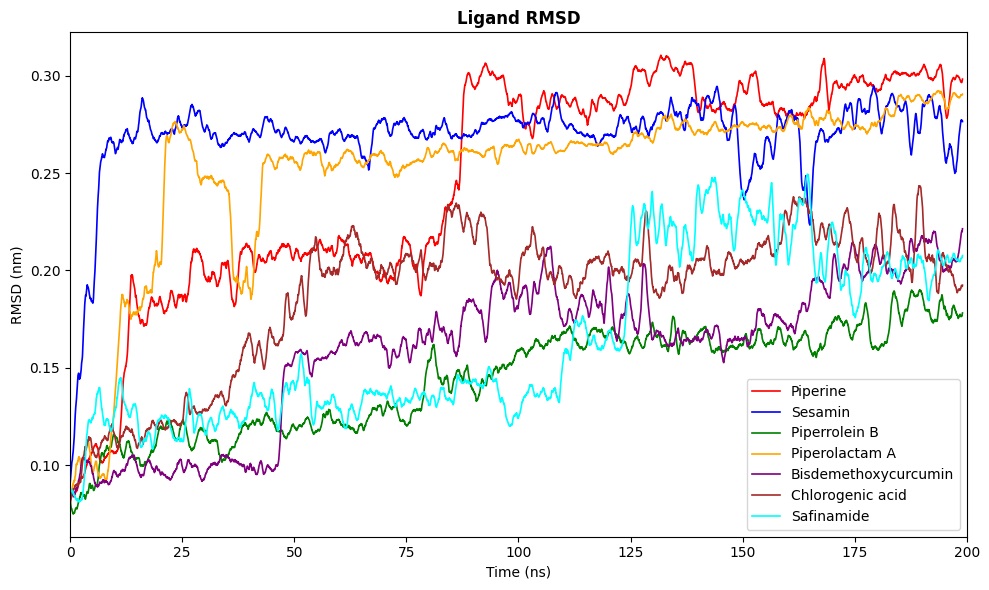

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Files
files = [
    ("rmsd_ligand/rmsd_ligand_piperine.xvg", "Piperine", "red"),
    ("rmsd_ligand/rmsd_ligand_sesamin.xvg", "Sesamin", "blue"),
    ("rmsd_ligand/rmsd_ligand_piperroleinb.xvg", "Piperrolein B", "green"),
    ("rmsd_ligand/rmsd_ligand_piperolactama.xvg", "Piperolactam A", "orange"),
    ("rmsd_ligand/rmsd_ligand_bisdemethoxycurcumin.xvg", "Bisdemethoxycurcumin", "purple"),
    ("rmsd_ligand/rmsd_ligand_chloro.xvg", "Chlorogenic acid", "brown"),
    ("rmsd_ligand/rmsd_ligand_safinamide.xvg", "Safinamide", "cyan"),
]

def load_xvg(path):
    data = []
    with open(path) as f:
        for line in f:
            if line.startswith(("#","@")):
                continue
            parts = line.strip().split()
            if len(parts) >= 2:
                # Convert ps → ns
                data.append((float(parts[0]) / 1000, float(parts[1])))
    data = np.array(data)
    return data[:,0], data[:,1]

# Smoothed plot
plt.figure(figsize=(10,6))
window = 50  # moving average window
for path, label, color in files:
    t, y = load_xvg(path)
    y_smooth = np.convolve(y, np.ones(window)/window, mode="valid")
    t_smooth = t[:len(y_smooth)]
    plt.plot(t_smooth, y_smooth, label=label, color=color, linewidth=1.2)

plt.title("Ligand RMSD", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel("RMSD (nm)")
plt.xlim(0, 200)  # force 200 ns scale
plt.legend()
plt.tight_layout()
plt.savefig("rmsd_ligand.png", dpi=600)
plt.show()

### Root Mean Square Fluctuation (RMSF)
The RMSF of backbone atoms was calculated to measure the flexibility of individual residues over the course of the simulation. Higher RMSF values indicate more flexible or disordered regions, while lower values correspond to stable and rigid parts of the protein.


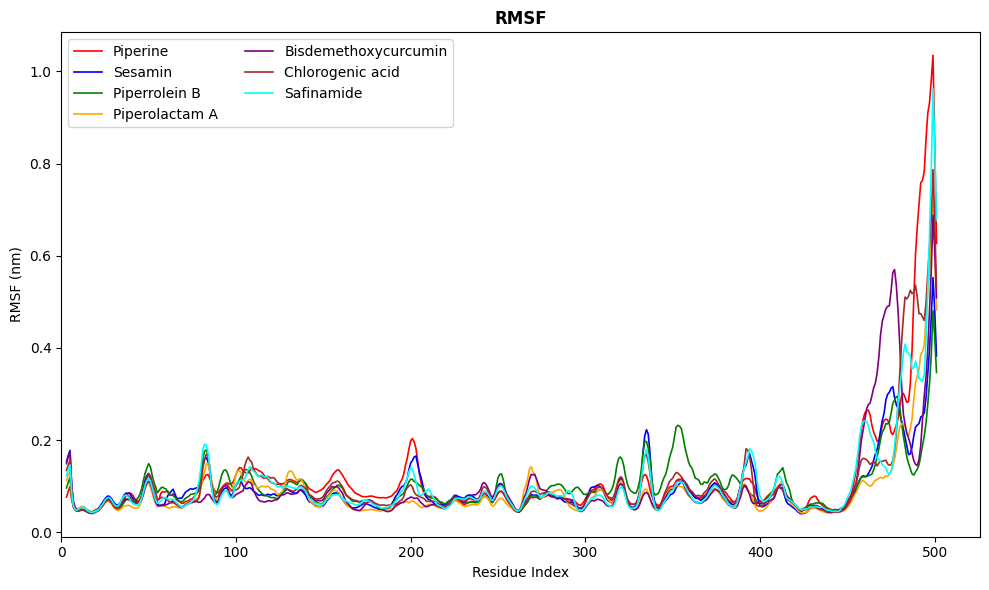

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Files
files = [
    ("rmsf/rmsf_residues_piperine.xvg", "Piperine", "red"),
    ("rmsf/rmsf_residues_sesamin.xvg", "Sesamin", "blue"),
    ("rmsf/rmsf_residues_piperroleinb.xvg", "Piperrolein B","green"),
    ("rmsf/rmsf_residues_piperolactama.xvg","Piperolactam A", "orange"),
    ("rmsf/rmsf_residues_bisdemethoxycurcumin.xvg","Bisdemethoxycurcumin","purple"),
    ("rmsf/rmsf_residues_chloro.xvg", "Chlorogenic acid", "brown"),
    ("rmsf/rmsf_residues_safinamide.xvg", "Safinamide", "cyan"),
]

def load_rmsf_xvg(path):
    """Return residue index and RMSF (nm) arrays from a .xvg file."""
    data = []
    with open(path) as f:
        for line in f:
            if line.startswith(("#","@")) or not line.strip():
                continue
            parts = line.split()
            if len(parts) >= 2:
                # col0 = residue index, col1 = RMSF (nm)
                data.append((float(parts[0]), float(parts[1])))
    arr = np.array(data)
    return arr[:,0], arr[:,1]

# Plot RMSF by residue
plt.figure(figsize=(10,6))

for path, label, color in files:
    x, y = load_rmsf_xvg(path)
    # optional light smoothing for readability (comment out if not wanted)
    window = 5
    y_smooth = np.convolve(y, np.ones(window)/window, mode="same")
    plt.plot(x, y_smooth, label=label, color=color, linewidth=1.2)

plt.title("RMSF", weight="bold")
plt.xlabel("Residue Index")
plt.ylabel("RMSF (nm)")
plt.xlim(left=0)
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("rmsf.png", dpi=600)
plt.show()

### Solvent Accessible Surface Area (SASA)
The SASA profile of the protein over time, describing changes in solvent exposure and potential compactness or unfolding events.

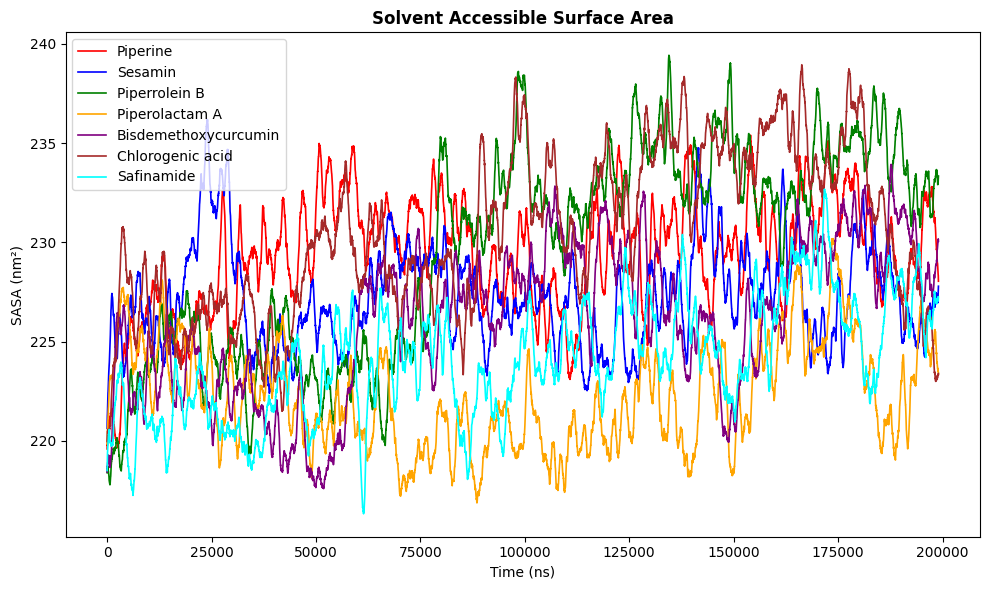

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Files
files = [
    ("gyrate/gyrate_piperine.xvg", "Piperine", "red"),
    ("gyrate/gyrate_sesamin.xvg", "Sesamin", "blue"),
    ("gyrate/gyrate_piperroleinb.xvg", "Piperrolein B", "green"),
    ("gyrate/gyrate_piperolactama.xvg", "Piperolactam A", "orange"),
    ("gyrate/gyrate_bisdemethoxycurcumin.xvg", "Bisdemethoxycurcumin", "purple"),
    ("gyrate/gyrate_chloro.xvg", "Chlorogenic acid", "brown"),
    ("gyrate/gyrate_safinamide.xvg", "Safinamide", "cyan"),
]

def load_xvg(path):
    data = []
    with open(path) as f:
        for line in f:
            if line.startswith(("#","@")): continue
            parts = line.strip().split()
            if len(parts) >= 2:
                data.append((float(parts[0]), float(parts[1])))
    data = np.array(data)
    return data[:,0], data[:,1]

# Smoothed plot
plt.figure(figsize=(10,6))
window = 50  # moving average window
for path, label, color in files:
    t, y = load_xvg(path)
    y_smooth = np.convolve(y, np.ones(window)/window, mode="valid")
    t_smooth = t[:len(y_smooth)]
    plt.plot(t_smooth, y_smooth, label=label, color=color, linewidth=1.2)

plt.title("Radius of gyration", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel("gyrate (nm²)")
plt.legend()
plt.tight_layout()
plt.savefig("gyrate.png", dpi=600)
plt.show()

### Radius of Gyration
The radius of gyration (Rg) of the protein throughout the trajectory, measuring overall compactness and folding stability of the system.


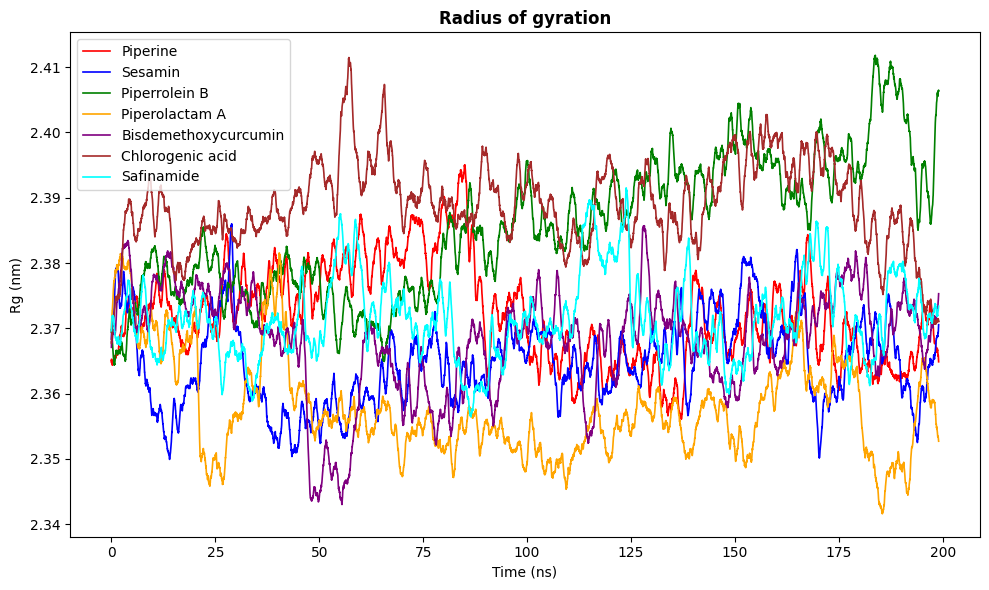

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Files
files = [
    ("gyrate/gyrate_piperine.xvg", "Piperine", "red"),
    ("gyrate/gyrate_sesamin.xvg", "Sesamin", "blue"),
    ("gyrate/gyrate_piperroleinb.xvg", "Piperrolein B", "green"),
    ("gyrate/gyrate_piperolactama.xvg", "Piperolactam A", "orange"),
    ("gyrate/gyrate_bisdemethoxycurcumin.xvg", "Bisdemethoxycurcumin", "purple"),
    ("gyrate/gyrate_chloro.xvg", "Chlorogenic acid", "brown"),
    ("gyrate/gyrate_safinamide.xvg", "Safinamide", "cyan"),
]

def load_xvg(path):
    data = []
    with open(path) as f:
        for line in f:
            if line.startswith(("#","@")): continue
            parts = line.strip().split()
            if len(parts) >= 2:
                data.append((float(parts[0]), float(parts[1])))
    data = np.array(data)
    t = data[:,0] / 1000.0   # convert ps → ns
    y = data[:,1]
    return t, y

# Smoothed plot
plt.figure(figsize=(10,6))
window = 50  # moving average window
for path, label, color in files:
    t, y = load_xvg(path)
    y_smooth = np.convolve(y, np.ones(window)/window, mode="valid")
    t_smooth = t[:len(y_smooth)]
    plt.plot(t_smooth, y_smooth, label=label, color=color, linewidth=1.2)

plt.title("Radius of gyration", weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel("Rg (nm)")
plt.legend()
plt.tight_layout()
plt.savefig("gyrate.png", dpi=600)
plt.show()

### Hydrogen Bonds
The number of protein–ligand hydrogen bonds monitored over time, reflecting binding stability and key interaction persistence.


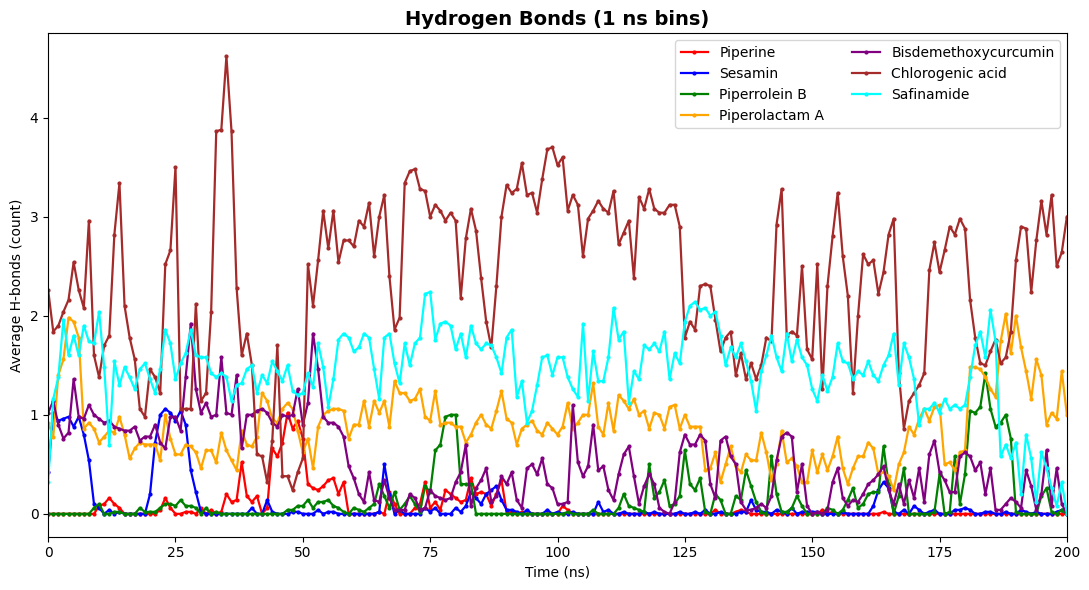

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Files and target colors (as requested: red, blue, green, yellow, purple, brown, cyan)
files = {
    "Piperine": "hbonds/hbonds_piperine.xvg",
    "Sesamin": "hbonds/hbonds_sesamin.xvg",
    "Piperrolein B": "hbonds/hbonds_piperroleinb.xvg",
    "Piperolactam A": "hbonds/hbonds_piperolactama.xvg",
    "Bisdemethoxycurcumin": "hbonds/hbonds_bisdemethoxycurcumin.xvg",
    "Chlorogenic acid": "hbonds/hbonds_chloro.xvg",
    "Safinamide": "hbonds/hbonds_safinamide.xvg",
}
colors = {
    "Piperine": "red",
    "Sesamin": "blue",
    "Piperrolein B": "green",
    "Piperolactam A": "orange",
    "Bisdemethoxycurcumin": "purple",
    "Chlorogenic acid": "brown",
    "Safinamide": "cyan",
}

def load_xvg_two_cols(path):
    times = []
    vals = []
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            if not line.strip() or line.startswith(('#','@')):
                continue
            parts = line.split()
            # take first two numeric entries
            nums = []
            for p in parts:
                try:
                    nums.append(float(p))
                except:
                    pass
            if len(nums) >= 2:
                times.append(nums[0])
                vals.append(nums[1])
    if not times:
        return pd.DataFrame(columns=["time_ns","h"])
    df = pd.DataFrame({"time": times, "h": vals})
    # convert to ns if looks like ps
    if df["time"].max() > 1000:  # assume ps
        df["time_ns"] = df["time"] / 1000.0
    else:
        df["time_ns"] = df["time"]
    return df[["time_ns","h"]]

# Bin each dataset to 1 ns and plot
plt.figure(figsize=(11,6))

binned_all = []
for name, path in files.items():
    if not os.path.exists(path):
        continue
    df = load_xvg_two_cols(path)
    if df.empty:
        continue
    df["bin"] = np.floor(df["time_ns"]).astype(int)
    binned = df.groupby("bin")["h"].mean().reset_index()
    binned["time_ns"] = binned["bin"].astype(float)
    plt.plot(
        binned["time_ns"],
        binned["h"],
        marker='o', markersize=2, linewidth=1.6,
        color=colors[name], label=name
    )
    binned["Ligand"] = name
    binned_all.append(binned[["time_ns","h","Ligand"]])


plt.title("Hydrogen Bonds (1 ns bins)", fontsize=14, weight="bold")
plt.xlabel("Time (ns)")
plt.ylabel("Average H-bonds (count)")
plt.xlim(0, 200)
plt.legend(ncol=2, frameon=True)
plt.tight_layout()
plt.savefig("hbonds.png", dpi=600)
plt.show()

### Eigenvalues of the covariance matrix
The eigenvalues of the covariance matrix from the PCA analysis quantify the contribution of each principal component to the total motion of the protein. Larger eigenvalues indicate dominant collective motions, while smaller eigenvalues represent less significant fluctuations. Plotting the eigenvalue spectrum helps determine how many principal components are needed to capture the essential dynamics of the system.

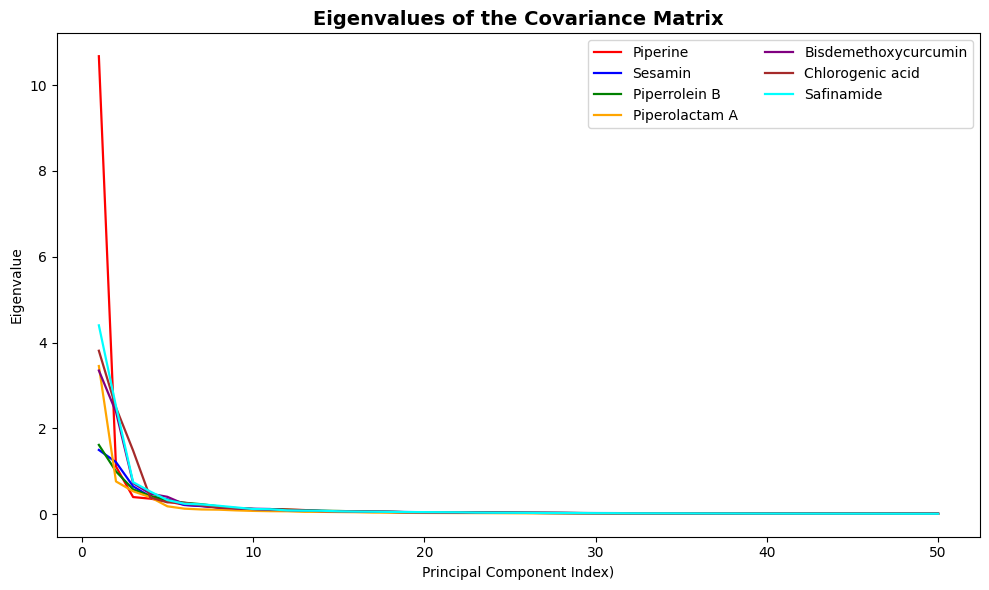

Saved CSV: eigenvalues/eigenvalues_all.csv
Saved figure: eigenvalues/eigenvalues.png


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Files
csv_path = "eigenvalues/eigenvalues_all.csv"

# Data loadinh
df = pd.read_csv(csv_path)

# If the file is wide (Mode + one column per ligand), melt it
if "Ligand" not in df.columns:
    # assume first column is the mode/index
    mode_col = df.columns[0]
    df_long = df.melt(id_vars=[mode_col], var_name="Ligand", value_name="Eigenvalue")
    df_long = df_long.rename(columns={mode_col: "Mode"})
else:
    # ensure columns are exactly Mode, Eigenvalue, Ligand
    rename_map = {}
    for c in df.columns:
        lc = c.lower()
        if lc.startswith("mode"): rename_map[c] = "Mode"
        elif "eigen" in lc: rename_map[c] = "Eigenvalue"
        elif "ligand" in lc: rename_map[c] = "Ligand"
    df_long = df.rename(columns=rename_map)[["Mode","Eigenvalue","Ligand"]]

# Consistent colors and plotting order
order_colors = [
    ("Piperine", "red"),
    ("Sesamin", "blue"),
    ("Piperrolein B", "green"),
    ("Piperolactam A", "orange"),
    ("Bisdemethoxycurcumin", "purple"),
    ("Chlorogenic acid", "brown"),
    ("Safinamide", "cyan"),
]
color_map = dict(order_colors)

# Save CSV of the (normalized) eigenvalues
out_csv = "eigenvalues/eigenvalues_all.csv"
df_long.to_csv(out_csv, index=False)

# Plot
plt.figure(figsize=(10,6))
for ligand, color in order_colors:
    sub = df_long[df_long["Ligand"] == ligand].sort_values("Mode")
    sub = sub[sub["Mode"] <= 50]
    if not sub.empty:
        plt.plot(sub["Mode"], sub["Eigenvalue"], label=ligand, color=color, linewidth=1.6)

plt.title("Eigenvalues of the Covariance Matrix", fontsize=14, weight="bold")
plt.xlabel("Principal Component Index)")
plt.ylabel("Eigenvalue")
plt.legend(ncol=2, frameon=True)
plt.tight_layout()
plt.savefig("eigenvalues.png", dpi=600, bbox_inches="tight")
plt.show()

print("Saved CSV:", out_csv)
print("Saved figure:", "eigenvalues/eigenvalues.png")

### Principal Component Analysis (PCA)
Essential dynamics analysis projecting backbone motions along the first two principal components, highlighting dominant conformational changes during the simulation.


Piperine: parsed 10001 points, first 5 = [(np.float64(5.9291), np.float64(-3.45992)), (np.float64(5.66949), np.float64(-3.74408)), (np.float64(5.70224), np.float64(-3.54795)), (np.float64(5.70739), np.float64(-3.58139)), (np.float64(5.7876), np.float64(-3.57027))]
Sesamin: parsed 10001 points, first 5 = [(np.float64(-0.46954), np.float64(7.27374)), (np.float64(-0.35376), np.float64(7.5448)), (np.float64(-0.45892), np.float64(7.23337)), (np.float64(-0.49489), np.float64(7.49325)), (np.float64(-0.53409), np.float64(7.46289))]
Piperrolein B: parsed 10001 points, first 5 = [(np.float64(1.87481), np.float64(-0.54925)), (np.float64(1.9473), np.float64(-0.0889)), (np.float64(2.30207), np.float64(0.27541)), (np.float64(2.07342), np.float64(-0.06068)), (np.float64(2.22521), np.float64(0.24334))]
Piperolactam A: parsed 10001 points, first 5 = [(np.float64(7.30955), np.float64(-2.44455)), (np.float64(7.56988), np.float64(-2.34374)), (np.float64(7.34848), np.float64(-2.29843)), (np.float64(7.33314

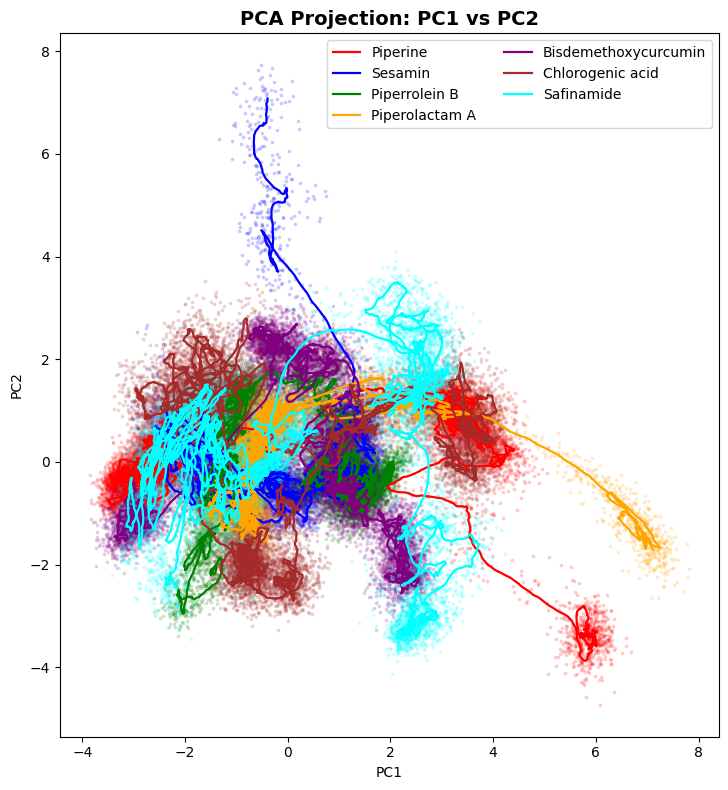

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Files
files = [
    ("pca/PC1PC2_piperine.xvg",             "Piperine",             "red"),
    ("pca/PC1PC2_sesamin.xvg",              "Sesamin",              "blue"),
    ("pca/PC1PC2_piperroleinb.xvg",         "Piperrolein B",        "green"),
    ("pca/PC1PC2_piperolactama.xvg",        "Piperolactam A",       "orange"),
    ("pca/PC1PC2_bisdemethoxycurcumin.xvg", "Bisdemethoxycurcumin", "purple"),
    ("pca/PC1PC2_chloro.xvg",               "Chlorogenic acid",     "brown"),
    ("pca/PC1PC2_safinamide.xvg",           "Safinamide",           "cyan"),
]

def load_pc1pc2(path):
    """Read last two numeric columns from an .xvg, skipping comments."""
    x, y = [], []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            if not line.strip() or line[0] in ("#", "@", ";"):
                continue
            parts = line.split()
            # keep only numbers
            nums = []
            for p in parts:
                try:
                    nums.append(float(p))
                except ValueError:
                    continue
            if len(nums) >= 2:
                x.append(nums[-2])  # take last-but-one col
                y.append(nums[-1])  # take last col
    return np.array(x), np.array(y)

def moving_avg(arr, window=50):
    if arr.size < window:
        return arr
    kernel = np.ones(window) / window
    return np.convolve(arr, kernel, mode="valid")

# --- Plot PC1 vs PC2 ---
plt.figure(figsize=(8, 8))
window = 50

for path, label, color in files:
    if not os.path.exists(path):
        print(f"Missing file: {path}")
        continue
    pc1, pc2 = load_pc1pc2(path)
    if pc1.size == 0 or pc2.size == 0:
        print(f"No numeric data in {path}")
        continue

    print(f"{label}: parsed {len(pc1)} points, first 5 = {list(zip(pc1[:5], pc2[:5]))}")

    # scatter raw data
    plt.scatter(pc1, pc2, s=3, color=color, alpha=0.15)

    # smooth
    pc1_s = moving_avg(pc1, window)
    pc2_s = moving_avg(pc2, window)
    n = min(len(pc1_s), len(pc2_s))
    if n > 0:
        plt.plot(pc1_s[:n], pc2_s[:n], color=color, linewidth=1.6, label=label)

plt.title("PCA Projection: PC1 vs PC2", fontsize=14, weight="bold")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(ncol=2, frameon=True)
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.savefig("PC1_PC2_smoothed.png", dpi=600, bbox_inches="tight")
plt.show()

### Free Energy Landscape (FEL)
The free energy landscape was computed by projecting the molecular dynamics trajectory onto the first two principal components (PC1 and PC2).  
This 2D representation highlights the most populated conformational states sampled during the simulation.  
Local minima correspond to stable conformations, while barriers between basins represent transition states.  
The FEL provides insight into conformational heterogeneity and the stability of ligand–protein complexes.


/tmp/ipython-input-278606953.py:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, header=None, names=["PC1","PC2","FreeEnergy"])
/tmp/ipython-input-278606953.py:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, header=None, names=["PC1","PC2","FreeEnergy"])
/tmp/ipython-input-278606953.py:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True, header=None, names=["PC1","PC2","FreeEnergy"])
/tmp/ipython-input-278606953.py:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` inste

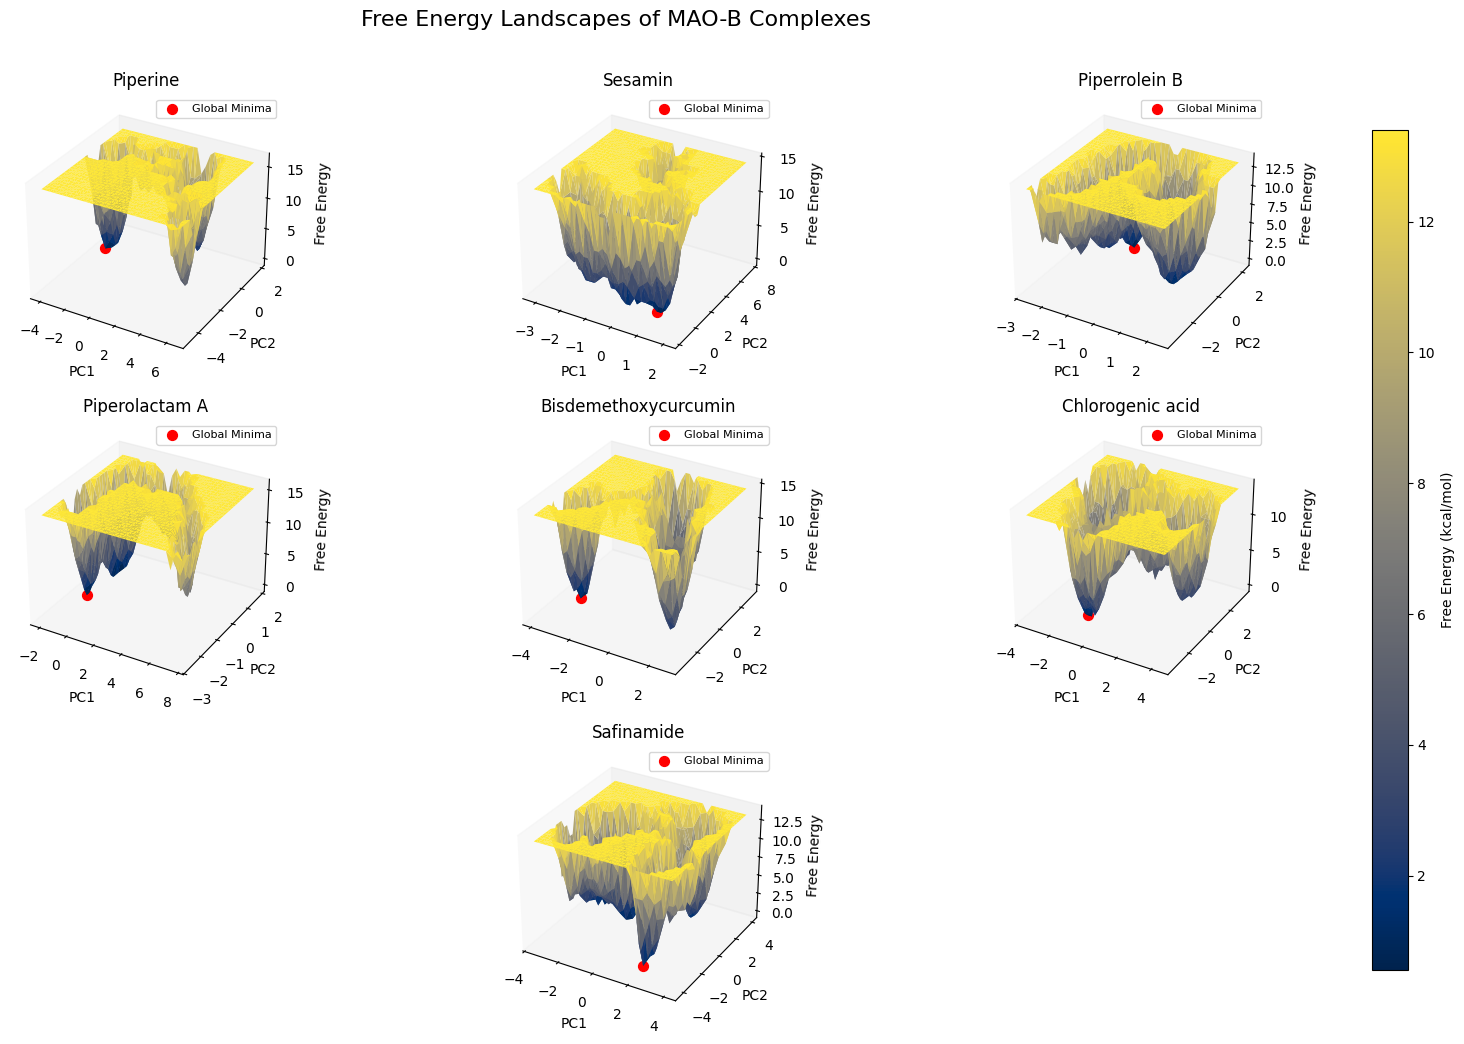

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

files = {
    "Piperine": "fel/fel_piperine.dat",
    "Sesamin": "fel/fel_sesamin.dat",
    "Piperrolein B": "fel/fel_piperroleinb.dat",
    "Piperolactam A": "fel/fel_piperolactama.dat",
    "Bisdemethoxycurcumin": "fel/fel_bisdemethoxycurcumin.dat",
    "Chlorogenic acid": "fel/fel_chloro.dat",
    "Safinamide": "fel/fel_safinamide.dat"
}

labels = list(files.keys())

# Use GridSpec: 3 rows, 3 columns
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(3, 3, figure=fig)

for i, (label, path) in enumerate(files.items()):
    # Choose subplot placement
    if i < 3:
        ax = fig.add_subplot(gs[0, i], projection="3d")   # row 0, col 0-2
    elif i < 6:
        ax = fig.add_subplot(gs[1, i-3], projection="3d") # row 1, col 0-2
    else:
        ax = fig.add_subplot(gs[2, :], projection="3d")   # row 2, span all 3 cols

    # Load data
    data = pd.read_csv(path, delim_whitespace=True, header=None, names=["PC1","PC2","FreeEnergy"])
    X, Y, Z = data["PC1"].values, data["PC2"].values, data["FreeEnergy"].values

    surf = ax.plot_trisurf(X, Y, Z, cmap="cividis", edgecolor="none")
    ax.set_title(label, fontsize=12)
    ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("Free Energy")

    # Remove gridlines for clean look
    ax.grid(False)

    # Highlight minimum
    min_idx = np.argmin(Z)
    ax.scatter(X[min_idx], Y[min_idx], Z[min_idx], color="red", s=50, label="Global Minima")
    ax.legend(fontsize=8)

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(surf, cax=cbar_ax, label="Free Energy (kcal/mol)")

plt.suptitle("Free Energy Landscapes of MAO-B Complexes", fontsize=16, y=0.95)
plt.savefig("FEL_panel.png", dpi=600, bbox_inches="tight")
plt.show()

### MM/PBSA Per-Residue Decomposition
Per-residue free energy decomposition from MM/PBSA calculations, identifying key amino acids contributing to ligand binding through van der Waals, electrostatics, and solvation energies.


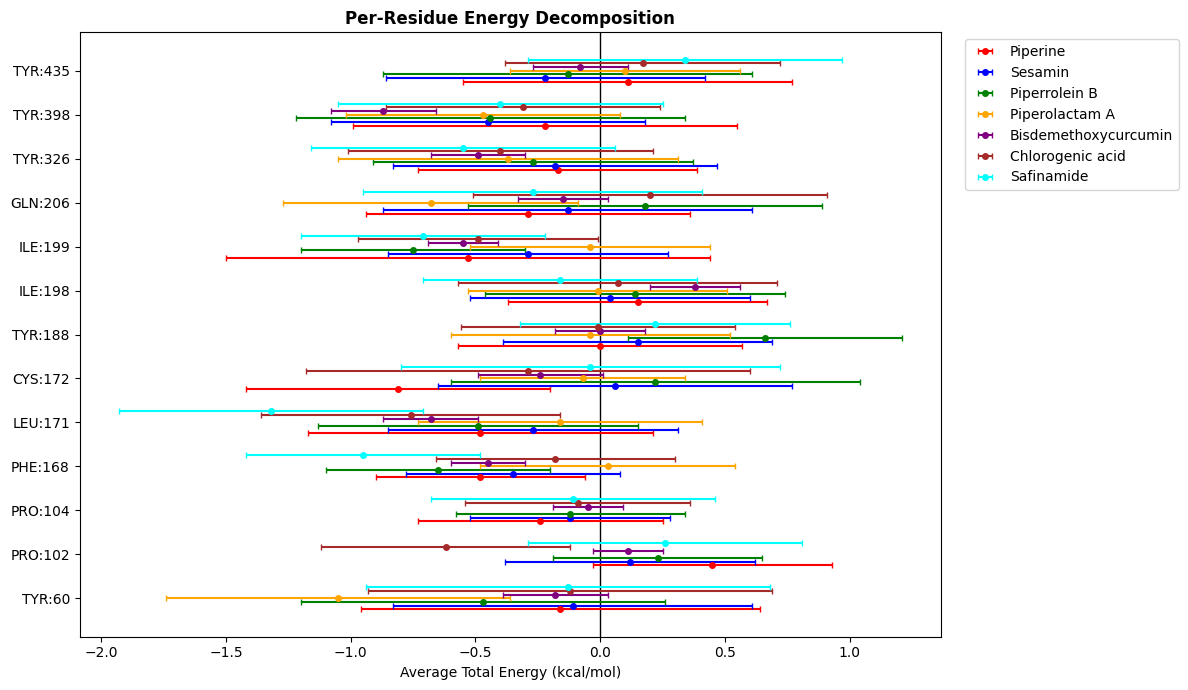

In [ ]:
# Cleveland plot of residue energies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load CSV
dfw = pd.read_csv("decomp/decomp.csv")


# Settings
comp_order = ["Piperine","Sesamin","Piperrolein B","Piperolactam A",
              "Bisdemethoxycurcumin","Chlorogenic acid","Safinamide"]

compound_colors = {
    "Piperine": "red",
    "Sesamin": "blue",
    "Piperrolein B": "green",
    "Piperolactam A": "orange",
    "Bisdemethoxycurcumin": "purple",
    "Chlorogenic acid": "brown",
    "Safinamide": "cyan"
}

# Convert wide → long
records=[]
for _, r in dfw.iterrows():
    for c in comp_order:
        avg_col = f"Average Total Energy ({c})"
        sem_col = f"SEM ({c})"
        if avg_col in dfw.columns and sem_col in dfw.columns:
            records.append({
                "Residue": r["Residue"],
                "Compound": c,
                "Avg": r[avg_col],
                "SEM": r[sem_col]
            })

long = pd.DataFrame(records)

# Plot Cleveland dot plot
residues = dfw["Residue"].tolist()
ypos = np.arange(len(residues))

fig, ax = plt.subplots(figsize=(12, 7))
ax.axvline(0, lw=1, color="k")

jit = np.linspace(-0.25, 0.25, len(comp_order))  # small vertical offsets
for j, c in enumerate(comp_order):
    sub = long[long["Compound"]==c]
    y = [ypos[residues.index(r)] for r in sub["Residue"]]
    ax.errorbar(sub["Avg"],
                np.array(y)+jit[j],
                xerr=sub["SEM"],
                fmt='o',
                ms=4,
                capsize=2,
                label=c,
                color=compound_colors[c])

ax.set_yticks(ypos);
ax.set_yticklabels(residues)
ax.set_xlabel("Average Total Energy (kcal/mol)")
ax.set_title("Per-Residue Energy Decomposition", weight="bold")
ax.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.savefig("decomp.png", dpi=600)
plt.show()

### Export results
All generated outputs (plots, CSVs, etc.) are compressed into a single ZIP archive and downloaded locally.  
This ensures reproducibility and allows sharing of complete results alongside the notebook.

In [ ]:
!zip -r results.zip /content/*

from google.colab import files
files.download('results.zip')

updating: content/eigenvalues/ (stored 0%)
updating: content/eigenvalues/eigenvalues_all.csv (deflated 79%)
updating: content/eigenvalues/eigenvalues_safinamide.csv (deflated 71%)
updating: content/eigenvalues/eigenvalues_piperroleinb.csv (deflated 71%)
updating: content/eigenvalues/eigenvalues_piperolactama.csv (deflated 71%)
updating: content/eigenvalues/eigenvalues_sesamin.csv (deflated 71%)
updating: content/eigenvalues/.ipynb_checkpoints/ (stored 0%)
updating: content/eigenvalues/eigenvalues_chloro.csv (deflated 73%)
updating: content/eigenvalues/eigenvalues_piperine.csv (deflated 71%)
updating: content/eigenvalues/eigenvalues_bisdemethoxycurcumin.csv (deflated 71%)
updating: content/eigenvalues.png (deflated 28%)
updating: content/gyrate/ (stored 0%)
updating: content/gyrate/gyrate_piperroleinb.xvg (deflated 77%)
updating: content/gyrate/gyrate_bisdemethoxycurcumin.xvg (deflated 77%)
updating: content/gyrate/gyrate_chloro.xvg (deflated 77%)
updating: content/gyrate/gyrate_sesamin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>